# **US College Data AutoML**

**Abstract**

This assignment explores the application of AutoML techniques to a dataset of U.S. college statistics to uncover underlying patterns and develop predictive models. We harnesse the power of H2O's AutoML library to automate the model selection process, aiming to predict outcomes based on a variety of academic and financial factors.

# **Importing required Libraries and H2O Initialization**

In [1]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future


In [2]:
!pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.2/265.2 MB 4.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.3-py2.py3-none-any.whl size=265293968 sha256=8de22dcf7eeaf60f2996f86a9da009a3af1d1a05f7cd7b659cd3511d59e8e6b9
  Stored in directory: /root/.cache/pip/wheels/77/9a/1c/2da26f943fd46b57f3c20b54847b936b9152b831dc7447cf71
Successfully built h2o


In [33]:
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set(context="notebook", palette="Spectral", style = 'darkgrid' ,font_scale = 1.5, color_codes=True)
import warnings
warnings.filterwarnings('ignore')
import os
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.21" 2023-10-17; OpenJDK Runtime Environment (build 11.0.21+9-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.21+9-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpn71a2g2s
  JVM stdout: /tmp/tmpn71a2g2s/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpn71a2g2s/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.3
H2O_cluster_version_age:,1 month and 30 days
H2O_cluster_name:,H2O_from_python_unknownUser_nkri5m
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [5]:
from google.colab import drive
drive.mount('/content/drive')


file_path = '/content/drive/My Drive/College_Data.csv'

Mounted at /content/drive


In [6]:
data_path = "/content/drive/My Drive/College_Data.csv"
data = h2o.import_file(path=data_path)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [7]:
# Drop the 'Private' column using H2O syntax
data_without_private = data.drop('Private')




In [8]:
data_without_private.head()

C1,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
Albertson College,587,479,158,38,62,678,41,13500,3335,500,675,67,73,9.4,11,9727,55
Albertus Magnus College,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
Albion College,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
Albright College,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
Alderson-Broaddus College,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


In [9]:
response = "Grad.Rate"
predictors = list(data_without_private.columns)
predictors.remove('Grad.Rate')

In [10]:
aml = H2OAutoML(max_runtime_secs=333, seed=1, nfolds = 5)


In [11]:

aml.train(x=predictors, y=response, training_frame=data_without_private)

AutoML progress: |
20:21:11.128: _train param, Dropping bad and constant columns: [C1]

██
20:21:17.985: _train param, Dropping bad and constant columns: [C1]


20:21:19.98: _train param, Dropping bad and constant columns: [C1]

█
20:21:22.496: _train param, Dropping unused columns: [C1]


20:21:22.808: _train param, Dropping bad and constant columns: [C1]

██
20:21:25.889: _train param, Dropping bad and constant columns: [C1]

█
20:21:32.961: _train param, Dropping bad and constant columns: [C1]

█
20:21:35.116: _train param, Dropping bad and constant columns: [C1]


20:21:37.204: _train param, Dropping bad and constant columns: [C1]

█
20:21:39.331: _train param, Dropping unused columns: [C1]
20:21:39.498: _train param, Dropping unused columns: [C1]
20:21:39.748: _train param, Dropping bad and constant columns: [C1]

███
20:21:44.430: _train param, Dropping bad and constant columns: [C1]

██
20:21:51.614: _train param, Dropping bad and constant columns: [C1]

█
20:21:54.12: _train pa

key,value
Stacking strategy,cross_validation
Number of base models (used / total),3/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),0/1
# GLM base models (used / total),1/1
# DeepLearning base models (used / total),1/1
# DRF base models (used / total),0/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


# **Leaderboard**

In [12]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240219_202110,12.5461,157.405,9.27775,0.226112,157.405
StackedEnsemble_BestOfFamily_5_AutoML_1_20240219_202110,12.6176,159.204,9.37231,0.226466,159.204
GBM_grid_1_AutoML_1_20240219_202110_model_3,12.6923,161.094,9.56194,0.229336,161.094
StackedEnsemble_BestOfFamily_2_AutoML_1_20240219_202110,12.7248,161.92,9.46128,0.228094,161.92
StackedEnsemble_BestOfFamily_1_AutoML_1_20240219_202110,12.7455,162.449,9.48336,0.228292,162.449
StackedEnsemble_AllModels_4_AutoML_1_20240219_202110,12.753,162.639,9.59475,0.230017,162.639
StackedEnsemble_AllModels_1_AutoML_1_20240219_202110,12.7981,163.791,9.48012,0.229753,163.791
StackedEnsemble_AllModels_3_AutoML_1_20240219_202110,12.8028,163.911,9.62051,0.230914,163.911
StackedEnsemble_AllModels_2_AutoML_1_20240219_202110,12.8067,164.012,9.49343,0.229541,164.012
StackedEnsemble_BestOfFamily_3_AutoML_1_20240219_202110,12.8081,164.047,9.49616,0.229214,164.047


# **Is the relationship significant?**

Export File progress: |██████████████████████████████████████████████████████████| (done) 100%


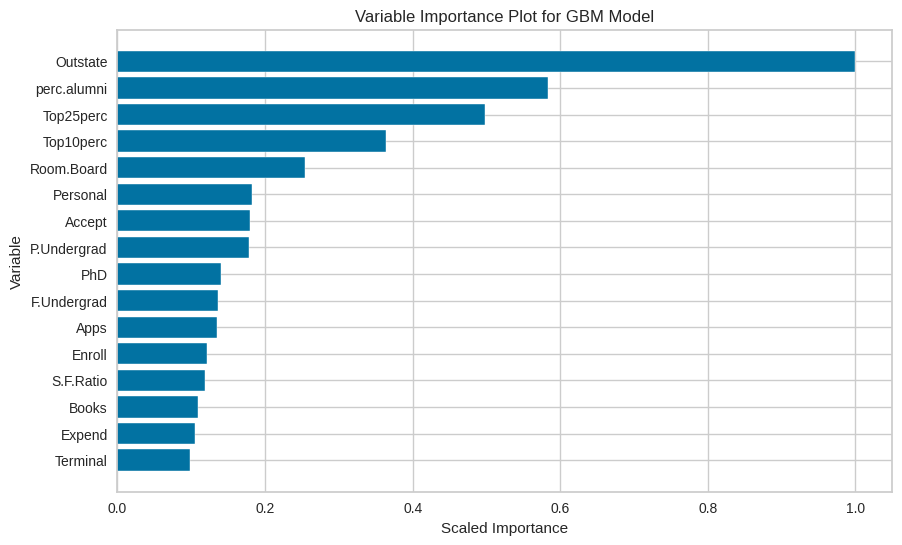

In [13]:
# Get the GBM Model from the leaderboard
model_row = aml.leaderboard.as_data_frame().iloc[2]

# Get model ID from the row
model_id = model_row['model_id']

# Retrieve the GBM model using the model ID
model = h2o.get_model(model_id)

# Retrieve the variable importance
varimp = model.varimp(use_pandas=True)

# Convert varimp dataframe to dictionary for plotting
varimp_dict = dict(zip(varimp['variable'], varimp['scaled_importance']))

# Sort variable importance dictionary by importance values
varimp_sorted = sorted(varimp_dict.items(), key=lambda x: x[1], reverse=True)

# Plot variable importance
plt.figure(figsize=(10, 6))
plt.barh([x[0] for x in varimp_sorted], [x[1] for x in varimp_sorted])
plt.xlabel('Scaled Importance')
plt.ylabel('Variable')
plt.title('Variable Importance Plot for GBM Model')
plt.gca().invert_yaxis()  # Invert y-axis to display variables with highest importance at the top
plt.show()

The variable importance plot for the GBM model suggests that tuition costs for out-of-state students ('Outstate'), alumni engagement ('perc.alumni'), and the academic caliber of students ('Top25perc' and 'Top10perc') are the top factors influencing graduation rates. This indicates that financial considerations, alumni involvement, and student selectivity play crucial roles in determining the likelihood of students graduating. Other factors, such as living costs ('Room.Board') and personal expenses ('Personal'), also contribute, but to a lesser extent. Variables related to institutional size and faculty qualifications have a moderate to low impact on graduation rates.

In [14]:
data_without_private = pd.read_csv("/content/drive/My Drive/College_Data.csv")

data_without_private.drop(columns='Unnamed: 0', inplace=True)

In [55]:
# Define the features matrix X by excluding the target variable 'Grad.Rate' and the 'Private' column
X = data_without_private.drop(['Grad.Rate', 'Private'], axis=1)

# Define the response variable Y as 'Grad.Rate'
y = data_without_private['Grad.Rate']



In [52]:
X_sm = sm.add_constant(X)  # Add a constant to the model
model = sm.OLS(y, X_sm).fit()
p_values = model.pvalues

# Step 5: Sort p-values in ascending order
sorted_p_values = p_values.sort_values(ascending=True)

# Step 6: Display the significant p-values (i.e. p < 0.05)
significant_p_values = sorted_p_values[sorted_p_values < 0.05]

print(significant_p_values)

const          2.704938e-15
perc.alumni    4.893072e-09
Outstate       1.465536e-07
P.Undergrad    1.042005e-04
Room.Board     5.203305e-04
Expend         2.020647e-03
Apps           6.872147e-03
Top25perc      1.434823e-02
Personal       3.056095e-02
dtype: float64


In [40]:
significant_variables = ['perc.alumni','Outstate','P.Undergrad','Room.Board','Expend','Apps','Top25perc','Personal']

# **Are any model assumptions violated?**

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Intialize the linear regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

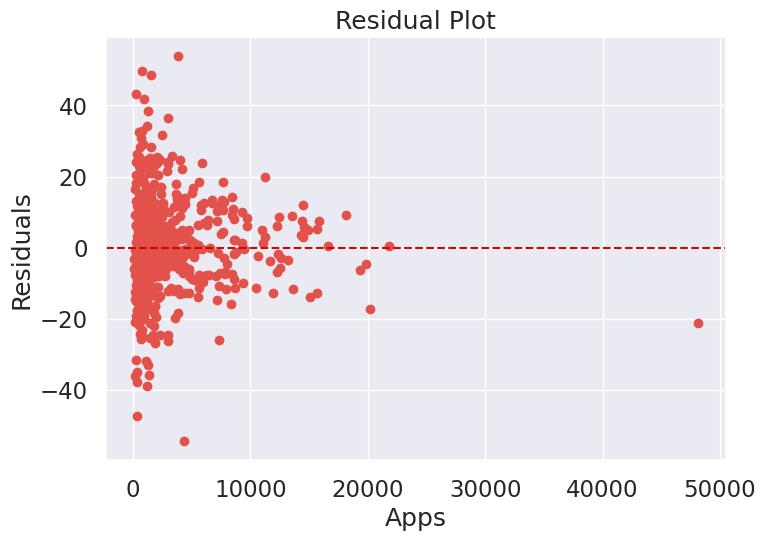

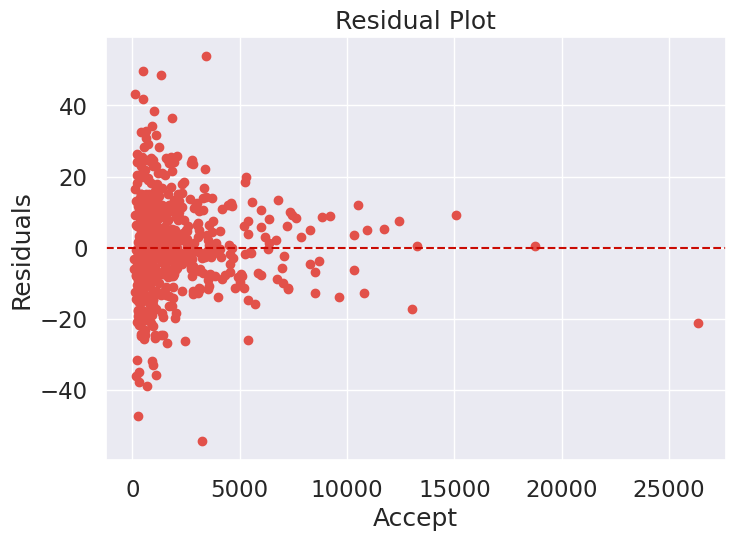

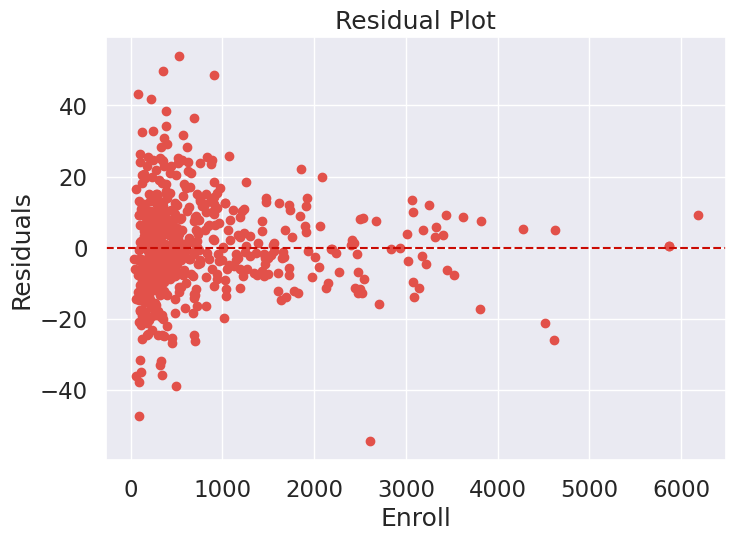

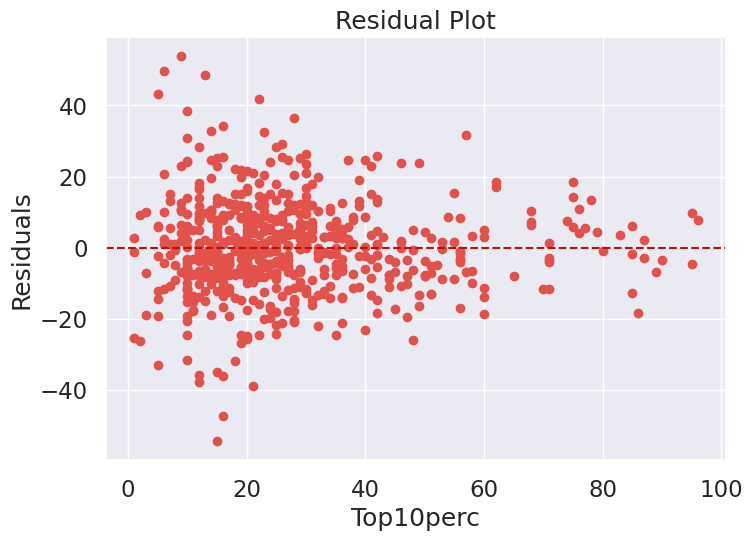

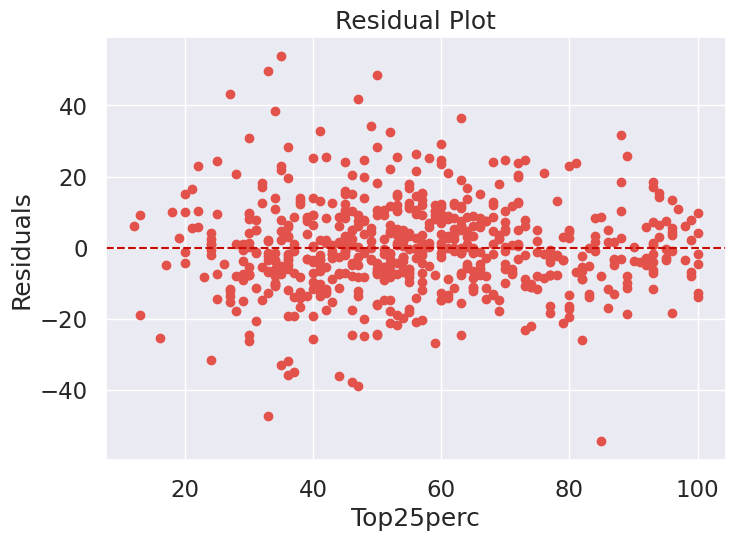

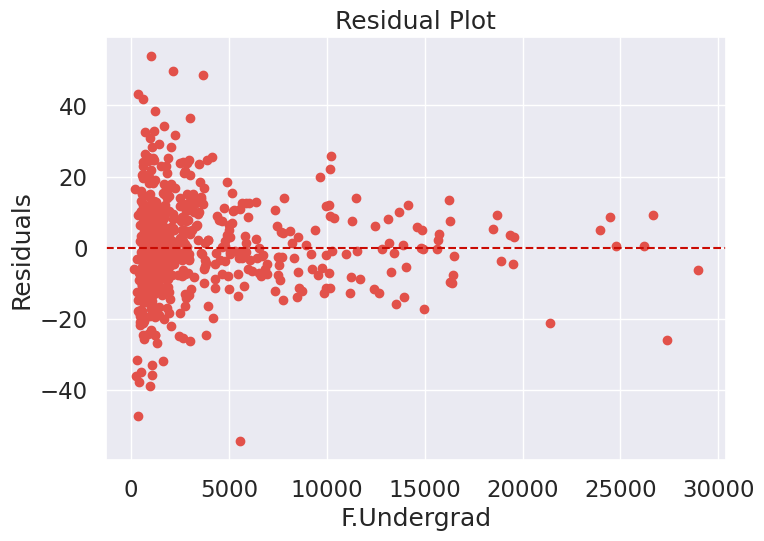

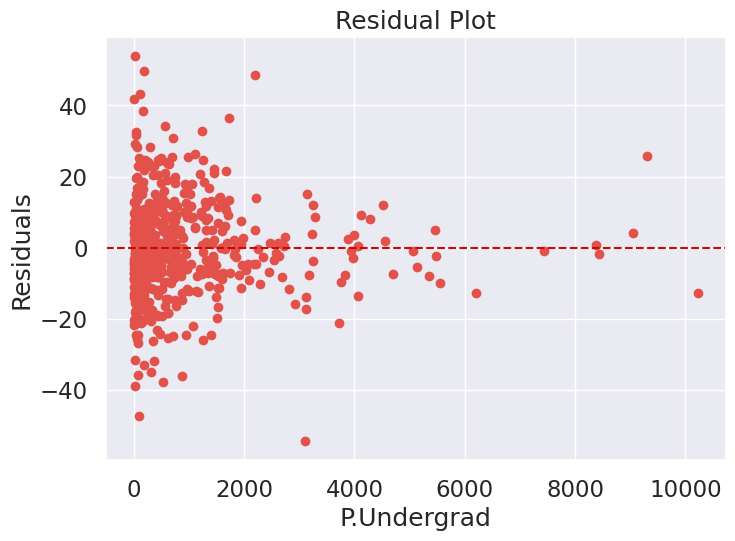

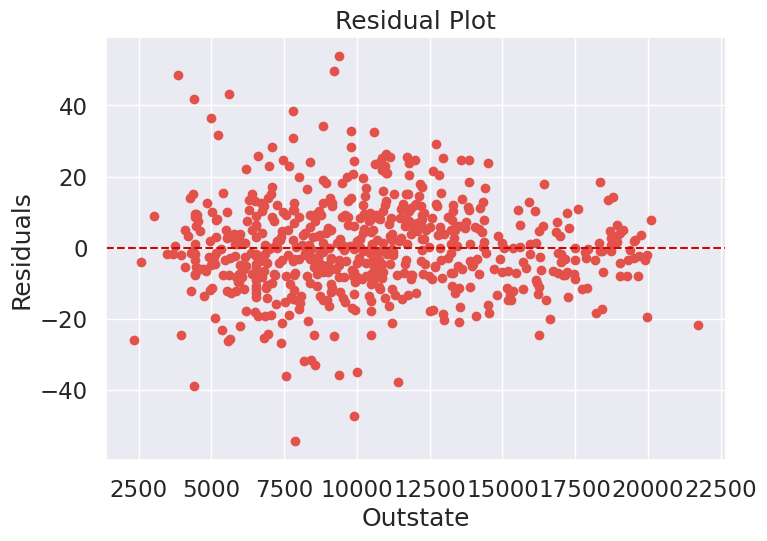

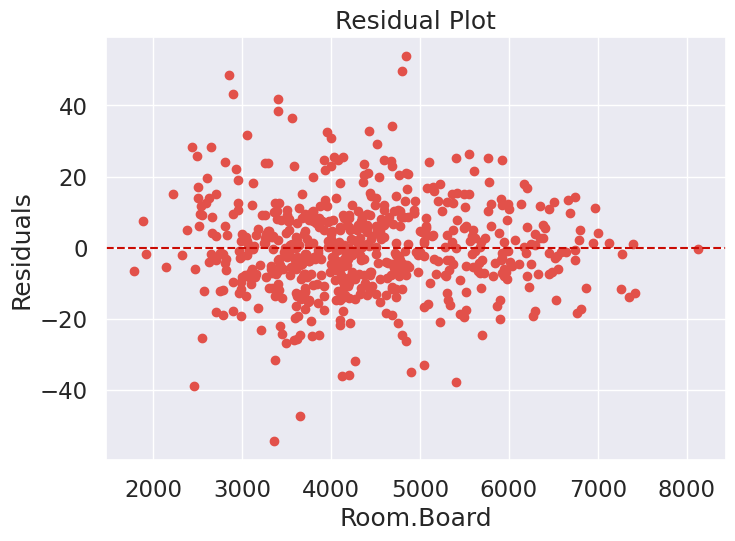

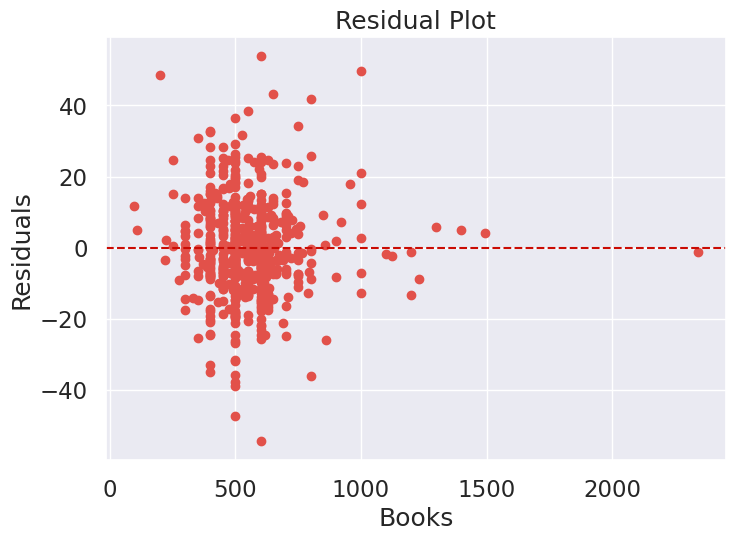

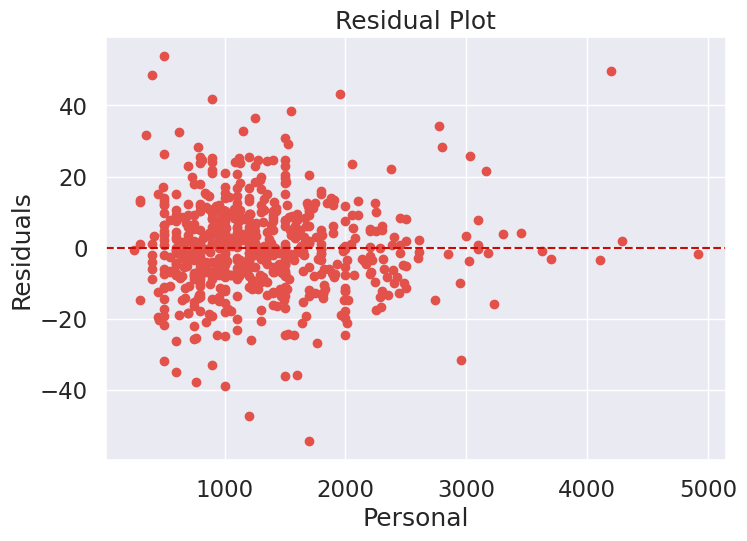

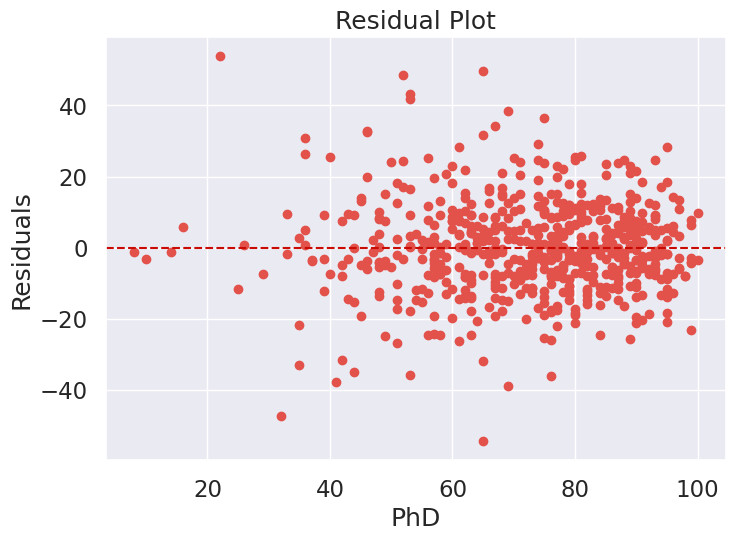

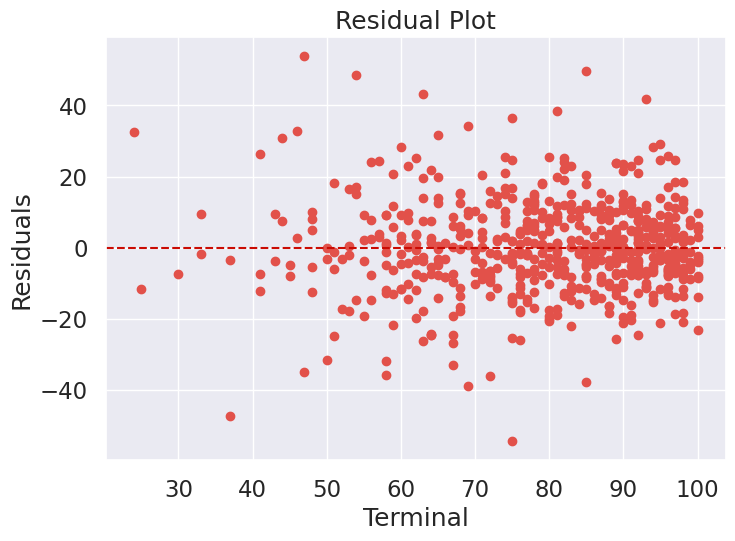

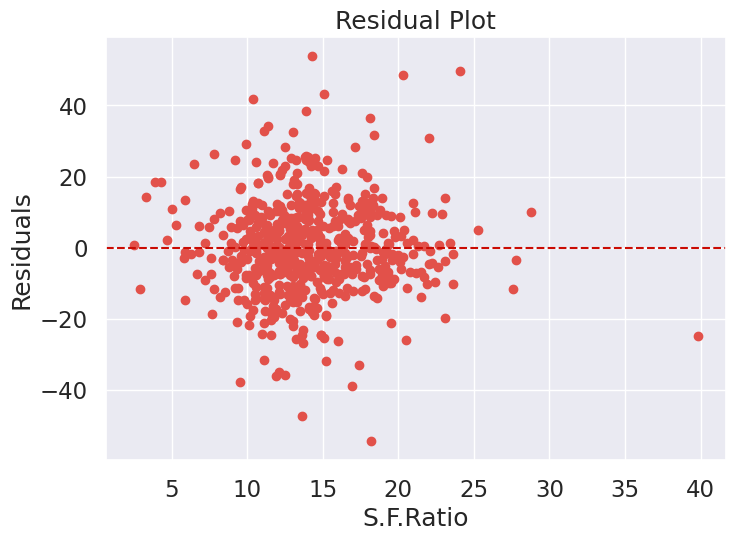

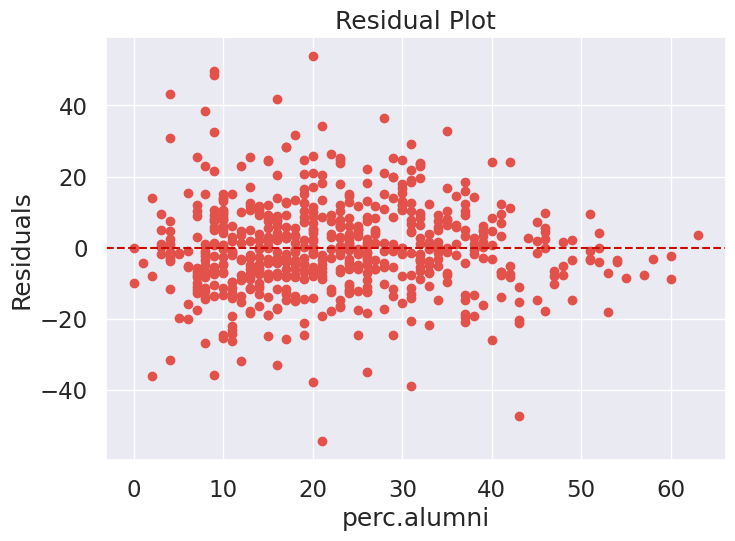

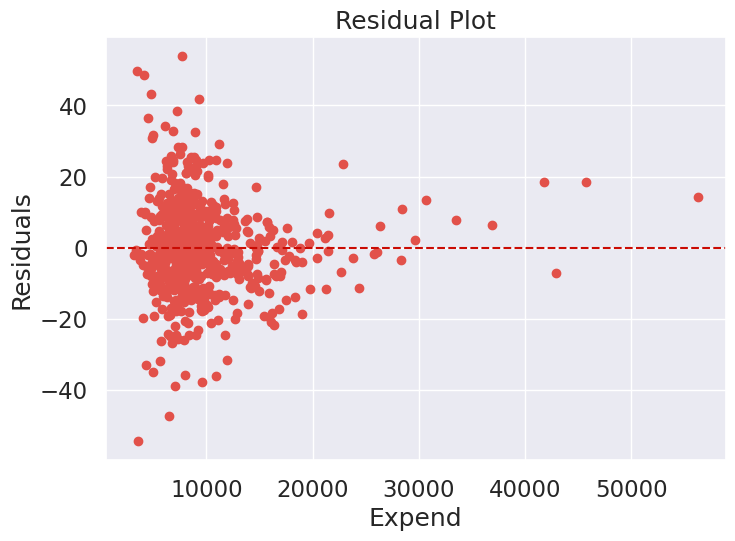

In [25]:
# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred

for column in X_train.columns:
  plt.scatter(X_train[column], residuals)
  plt.xlabel(column)
  plt.ylabel("Residuals")
  plt.title("Residual Plot")
  plt.axhline(y=0, color='r', linestyle='--')
  plt.show()

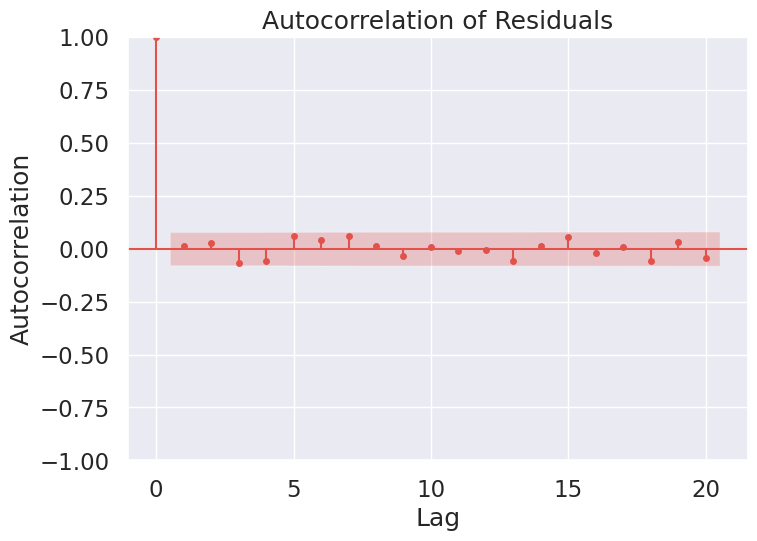

In [34]:
# Residuals Autocorrelation Plot
plot_acf(residuals, lags=20)
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.title("Autocorrelation of Residuals")
plt.show()


*   The first lag has a high autocorrelation coefficient, significantly above zero, which implies that there is a strong positive correlation between a data point and the next data point in the series.
*   For lags beyond the first, the autocorrelation coefficients are close to zero and fall within the confidence interval, suggesting that there is little to no autocorrelation at these lags.



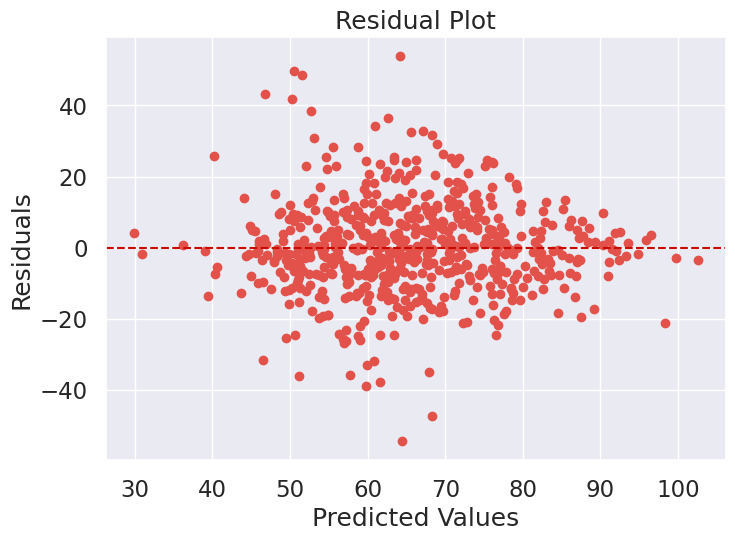

In [35]:
# Make predictions on the training data
y_pred = model.predict(X_train)

# Calculate residuals
residuals = y_train - y_pred

plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



1.   The distribution of residuals appears to be random around the horizontal line at zero, which suggests that the variance of the residuals is constant (homoscedasticity) for different levels of predicted values.
2.   There are no obvious outliers or influential points that would suggest problems with specific predictions. All residuals seem to be within a reasonable range from the red dashed line, which represents a residual value of zero.
3. The residuals do not show any signs of periodicity or recurring patterns. This suggests that the model is not missing any periodic components in the data.



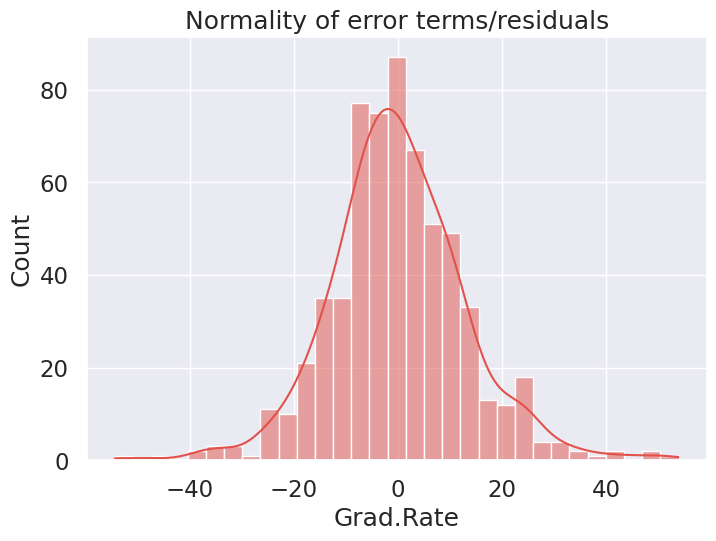

In [36]:
p = sns.histplot(residuals, kde=True)
p = plt.title('Normality of error terms/residuals')

The residuals from the model are roughly normally distributed, centering around zero with no significant outliers

# **Is there any multicollinearity in the model?**


In [37]:
data_without_private.corr()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Apps,1.000000,0.943451,0.846822,0.338834,0.351640,0.814491,0.398264,0.050159,0.164939,0.132559,0.178731,0.390697,0.369491,0.095633,-0.090226,0.259592,0.146755
Accept,0.943451,1.000000,0.911637,0.192447,0.247476,0.874223,0.441271,-0.025755,0.090899,0.113525,0.200989,0.355758,0.337583,0.176229,-0.159990,0.124717,0.067313
Enroll,0.846822,0.911637,1.000000,0.181294,0.226745,0.964640,0.513069,-0.155477,-0.040232,0.112711,0.280929,0.331469,0.308274,0.237271,-0.180794,0.064169,-0.022341
Top10perc,0.338834,0.192447,0.181294,1.000000,0.891995,0.141289,-0.105356,0.562331,0.371480,0.118858,-0.093316,0.531828,0.491135,-0.384875,0.455485,0.660913,0.494989
Top25perc,0.351640,0.247476,0.226745,0.891995,1.000000,0.199445,-0.053577,0.489394,0.331490,0.115527,-0.080810,0.545862,0.524749,-0.294629,0.417864,0.527447,0.477281
F.Undergrad,0.814491,0.874223,0.964640,0.141289,0.199445,1.000000,0.570512,-0.215742,-0.068890,0.115550,0.317200,0.318337,0.300019,0.279703,-0.229462,0.018652,-0.078773
P.Undergrad,0.398264,0.441271,0.513069,-0.105356,-0.053577,0.570512,1.000000,-0.253512,-0.061326,0.081200,0.319882,0.149114,0.141904,0.232531,-0.280792,-0.083568,-0.257001
Outstate,0.050159,-0.025755,-0.155477,0.562331,0.489394,-0.215742,-0.253512,1.000000,0.654256,0.038855,-0.299087,0.382982,0.407983,-0.554821,0.566262,0.672779,0.571290
Room.Board,0.164939,0.090899,-0.040232,0.371480,0.331490,-0.068890,-0.061326,0.654256,1.000000,0.127963,-0.199428,0.329202,0.374540,-0.362628,0.272363,0.501739,0.424942
Books,0.132559,0.113525,0.112711,0.118858,0.115527,0.115550,0.081200,0.038855,0.127963,1.000000,0.179295,0.026906,0.099955,-0.031929,-0.040208,0.112409,0.001061




*   'Apps' and 'Accept' have a correlation coefficient of approximately 0.94,  suggesting a very strong positive relationship.
*   'Apps' and 'Enroll' also have a high correlation of approximately 0.85.
*  'Accept' and 'Enroll' have a correlation of approximately 0.91.
*'F.Undergrad' and 'Enroll' have a correlation of approximately 0.96, which is very high.

# **Does the model make sense?**

In [41]:
X= data_without_private[significant_variables]
y = data_without_private['Grad.Rate']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Intialize the linear regression model
model = LinearRegression()

#Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [44]:
# Make predictions using the training set
y_pred = model.predict(X_train)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_train, y_pred))
r2 = r2_score(y_train, y_pred)
print("R^2 score on tarining set =", r2)

Mean squared error: 174.43
Coefficient of determination: 0.44
R^2 score on tarining set = 0.4364101468801751


# **Does regularization help?**

In [53]:
from sklearn.linear_model import Lasso
# Initialize Lasso Regression model
# Alpha is the regularization strength; larger values specify stronger regularization.
lasso = Lasso(alpha=1.0)

# Fit the Lasso model on the training data
lasso.fit(X_train, y_train)

# Predict on the test data
y_pred = lasso.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Print the Mean Squared Error
print(f"Mean Squared Error: {mse}")

# The coefficients of the model can be accessed using lasso.coef_
print(f"Coefficients: {lasso.coef_}")


Mean Squared Error: 113.5022363521617
Coefficients: [ 0.29921924  0.00119419 -0.00236303  0.00186114 -0.00039989  0.00073165
  0.16860372 -0.00200909]


# **Which hyperparameters are important?**

In [56]:
import numpy as np
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Assuming 'X' and 'y' are already defined and contain your dataset

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize LassoCV to find the optimal alpha values with cross-validation
# The number of alphas to try is set by n_alphas, increase this number for a more fine-grained search
lasso_cv = LassoCV(alphas=None, cv=10, max_iter=10000, n_alphas=100)

# Fit the LassoCV model on the training data
lasso_cv.fit(X_train, y_train)

# Retrieve the alpha values tried during cross-validation and corresponding mean squared errors
alphas = lasso_cv.alphas_
mse_path = lasso_cv.mse_path_

# Calculate the mean MSE for each alpha across folds
mean_mse = mse_path.mean(axis=1)

# Combine the alphas and their corresponding mean MSE into a single array
alpha_mse_pairs = np.column_stack((alphas, mean_mse))

# Sort the pairs based on mean MSE
sorted_alpha_mse_pairs = alpha_mse_pairs[np.argsort(alpha_mse_pairs[:, 1])]

# Get the top 5 alpha values (with the lowest mean MSE)
top_5_alphas = sorted_alpha_mse_pairs[:5, 0]

# Print the top 5 alpha values
print(f"Top 5 alpha values: {top_5_alphas}")



Top 5 alpha values: [ 39.14132564  41.96996051 208.88548246 194.80730006 181.67794003]


# **Summary:**

**1) Is the relationship significant?**

Yes, the relationship between the predictor variables and the response variable is deemed significant based on both AutoML rankings, variable importance analysis and p values obtained through OLS.

**2)** **Are any model assumptions violated?**

*   **Linearity:** The assumption of linearity implies that there is a linear relationship between the independent variables and the dependent variable. Based on the residual plots, most of the residuals are randomly dispersed around the horizontal line, indicating that the relationship is linear. There does not seem to be a clear pattern that suggests non-linearity, so the assumption of linearity does not appear to be violated.
*  **Homoscedasticity:** This assumption requires that the residuals have constant variance at all levels of the independent variable. The residual plots do not show a pattern of increasing or decreasing spread over time. Although some variables (like 'Apps' and 'Accept') show a slight funnel shape, which could indicate heteroscedasticity, it is not pronounced. Therefore, overall, the assumption of homoscedasticity seems to be reasonably met with the possible exception of those variables.

* **Independence of Residuals:** The autocorrelation plot indicates that the residuals are not correlated with each other, which means the independence assumption is largely met. However, there is a significant spike at lag 1, indicating potential autocorrelation at this single lag.
* **Normality:** The histogram with the KDE overlay shows that the residuals are approximately normally distributed, although there might be slight skewness. Since the residuals seem to be symmetrically distributed around zero and the KDE shows a bell-shaped curve, the normality assumption does not seem to be violated.

**3)** **Is there any multicollinearity in the model?**
    
  Yes, the high correlation coefficients among variables such as 'Apps', 'Accept', 'Enroll', and 'F.Undergrad' indicate the presence of multicollinearity in the model

  **4) In the multivariate models are predictor variables independent of all the other predictor variables?**

  In the given multivariate models, the predictor variables are not independent of each other. The correlation matrix indicates the presence of multicollinearity, with several pairs of variables displaying high correlation coefficients. The high correlation coefficients among 'Apps', 'Accept', and 'Enroll' suggest a direct relationship between these variables. A correlation of 0.94 between 'Apps' and 'Accept' indicates that as the number of applications increases, the number of acceptances tends to increase as well. Similarly, the correlation of 0.85 between 'Apps' and 'Enroll' and 0.91 between 'Accept' and 'Enroll' implies that higher application and acceptance numbers are associated with higher enrollment numbers. This could be interpreted to mean that colleges with more applications tend to accept more students, which in turn results in more students enrolling. The particularly strong correlation of 0.96 between 'F.Undergrad' and 'Enroll' further reinforces this trend, suggesting that institutions with larger numbers of enrollments also have larger full-time undergraduate populations Such strong correlations suggest that these predictor variables share a significant amount of variance.Therefore, the assumption of predictor independence required for optimal multivariate regression modeling is not met.

  **5)** **In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

  The following predictor variables are ranked in ascending order of significance:

        1)perc.alumni    
        2)Outstate      
        3)P.Undergrad    
        4)Room.Board     
        5)Expend         
        6)Apps           
        7)Top25perc      
        8)Personal
        9)F.Undergrad
        10)Terminal  
        11)Enroll   
        12)Top10perc  
        13)Books  
        14)Accept
        15)S.F.Ratio      

        The insignificant predictor variables 'F.Undergrad','Terminal','Enroll','Top10perc','Books','Accept','S.F.Ratio' have been excluded from the model.


  **6) Does the model make sense?**

  Yes, the model makes sense as Linear regression is chosen for its interpretability, as it offers straightforward coefficients and an R² value of 0.43, comparable to more complex models, making it preferable for understanding the impact of each predictor.

  **7) Does regularization help?**

  Yes, regularization has helped improve the model's performance. The reduction in the Mean Squared Error (MSE) from 174.43 to 113.5 after applying L1 regularization suggests that it has helped to create a model that performs better on test data, likely by reducing overfitting and enhancing the model's ability to predict accurately.

  **8)Which independent variables are significant?**

 The following independent variables are ranked in ascending order of significance:

    1)perc.alumni    
    2)Outstate       
    3)P.Undergrad    
    4)Room.Board     
    5)Expend        
    6)Apps           
    7)Top25perc      
    8)Personal       

  **9) Which hyperparameters are important?**

  Top 5 alpha values: [ 39.14132564,  41.96996051, 208.88548246, 194.80730006, 181.67794003]

  These penalties (alpha values) when attached to the linear regression model helps avoiding overfitting and reduces the mse (mean squared error) from 174.43 to 113.5.

**CONCLUSION:**


In this assignment, I used H2O's AutoML to construct predictive models, focusing on interpretability and model validation. I found that linear regression models provided clear insights due to their straightforward coefficients. Regularization with L1 helped address multicollinearity and improved model performance by eliminating non-contributory variables. Hyperparameter tuning further refined our models. The assignment demonstrated AutoML's effectiveness in model selection and tuning, setting the stage for more complex data analysis and feature engineering in future work.






**LICENSE**

MIT License

Copyright (c) 2024 Vishruth Telugu Venugopal

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:


The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.


THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

**REFERENCES**



1.   H20.ai documentation
2.   Kaggle documentation
3.   Sckit learn documentation



